Saving GirlJPG.jpg to GirlJPG (2).jpg


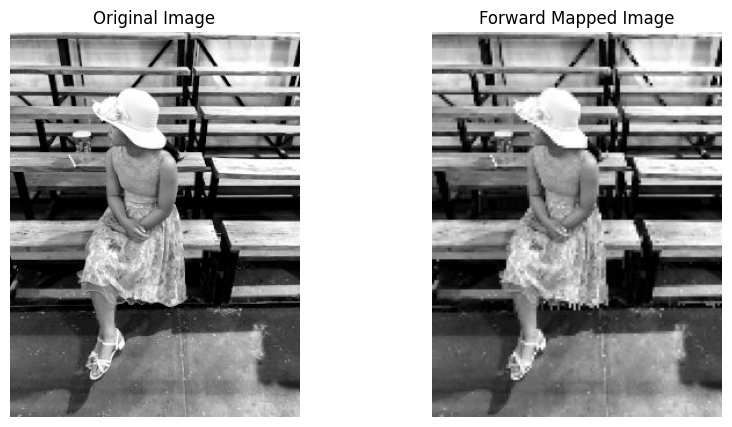

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import os

# Upload an image file
uploaded = files.upload()

# Assuming there's only one image uploaded, get the name of the file
image_filename = next(iter(uploaded))

# Read the image into a numpy array using matplotlib
image = plt.imread(image_filename)

# If the image has an alpha channel, remove it
if image.ndim == 3 and image.shape[2] == 4:
    image = image[:, :, :3]

# Function to interpolate pixel values
def interpolate(image, x, y):
    # Ensure the coordinates are within the image boundaries
    x = np.clip(x, 0, image.shape[1] - 1)
    y = np.clip(y, 0, image.shape[0] - 1)
    # Return the pixel value at the interpolated coordinates
    return image[int(y), int(x)]

# Forward mapping with hole filling via nearest neighbor
def forward_mapping_with_filling(image, scale_x, scale_y):
    height, width = image.shape[:2]
    new_height, new_width = int(height * scale_y), int(width * scale_x)

    # Initialize the forward mapping image with zeros
    forward_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype) if image.ndim == 3 else np.zeros((new_height, new_width), dtype=image.dtype)

    # Forward mapping
    for y in range(height):
        for x in range(width):
            dest_x = int(x * scale_x)
            dest_y = int(y * scale_y)
            # Ensure destination is within the new image bounds
            if dest_y < new_height and dest_x < new_width:
                forward_image[dest_y, dest_x] = image[y, x]

    # Hole filling
    for y in range(new_height):
        for x in range(new_width):
            if np.all(forward_image[y, x] == 0):  # Check if the pixel is unfilled
                # Find the nearest neighbor with a non-zero value
                neighbors = [
                    (max(y - 1, 0), x),
                    (min(y + 1, new_height - 1), x),
                    (y, max(x - 1, 0)),
                    (y, min(x + 1, new_width - 1))
                ]
                for ny, nx in neighbors:
                    if np.any(forward_image[ny, nx] != 0):
                        forward_image[y, x] = forward_image[ny, nx]
                        break

    return forward_image

# Assuming 'image' is your input image array
# Use forward mapping with hole filling
scaled_image = forward_mapping_with_filling(image, scale_x=0.5, scale_y=0.5)

# Display the results
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray' if image.ndim == 2 else None)
plt.title('Original Image')
plt.axis('off')

# Display forward-mapped image
plt.subplot(1, 2, 2)
plt.imshow(scaled_image, cmap='gray' if scaled_image.ndim == 2 else None)
plt.title('Forward Mapped Image')
plt.axis('off')

plt.show()
